# Near State-of-the-Art results at Object Recognition

This project uses Convolutional neural network(CNN) for object recognition.

reference:
The All-CNN network published in the 2015 ICLR paper, "Striving For Simplicity: The All Convolutional Net". This paper can be found at the following link:

https://arxiv.org/pdf/1412.6806.pdf

This CNN obtained state-of-the-art performance at object recognition on the CIFAR-10 image dataset.

This project has model built using Keras, NN API that with Tensorflow as backend;

The dataset use is CIFAE-10 dataset, consists of 60,000 32x32 color images in 10 classes, with 6000 images per class.
There are 50,000 training images and 10,000 test images.

<img src='https://samyzaf.com/ML/cifar10/cifar1.jpg'>

#### 1. Import Packages

In [35]:
# Loading necessary packages
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#### Load dataset

In [14]:
#load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [15]:
#lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [16]:
# Single Image
print(X_train[0].shape)

(32, 32, 3)


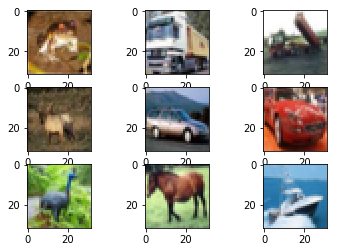

In [17]:
# Create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    
plt.show()

### 2. Preprocessing the dataset

Preprocess the images and labels in a form that Keras can ingest.

In [18]:
# Preprocessing the dataset

# fix random seed fro reproducability
seed = 0
np.random.seed(seed)

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the imputs from 0-225 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


The class labels are a single integer value (0-9).  What we really want is a one-hot vector of length ten.  For example, the class label of 6 should be denoted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0].  We can accomplish this using the np_utils.to_categorical() function.

In [20]:
# One-hot vector [6] = [0,0,0,0,0,0,1,0,0,0]

# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

num_class = Y_test.shape[1]

print(num_class)
print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 3. Building the All-CNN

Using the paper as a reference, we can implement the All-CNN network in Keras.  Keras models are built by simply adding layers, one after another. 

To make things easier for us later, we will wrap this model in a function, which will allow us to quickly and neatly generate the model later on in the project. 


source: https://arxiv.org/pdf/1412.6806.pdf   page. 3

Table 1: The three base networks used for classification on CIFAR-10 and CIFAR-100.
Model - C

* Input 32 × 32 RGB image
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU
* 3 × 3 max-pooling stride = 2
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 192 ReLU
* 3 × 3 max-pooling stride = 2
* 3 × 3 conv. 192 ReLU
* 1 × 1 conv. 192 ReLU
* 1 × 1 conv. 10 ReLU
* global averaging over 6 × 6 spatial dimensions
* 10 or 100-way softmax


In [21]:
# importing  necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [22]:
# define the model function

def allcnn(weights = None):
    
    # define model type- sequential
    model = Sequential()
    
    # add model layers
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape = (32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))
    
    # add Global Average Pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
        
    # return the model
    return model

### 4. Defining Parameters and Training the Model

We're all set! We are ready to start training our network. In the following cells, we will define our hyper parameters, such as learning rate and momentum, define an optimizer, compile the model, and fit the model to the training data.

But training our network requires GPU for high computations,
so instead we will use pre-trained weights for All-CNN network.

Using these weights, we can evaluate the performance of the All-CNN on the test dataset.

In [23]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model and define weights
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print(model.summary())

# define additional training parameters
#vepochs = 350
# batch_size = 32

# fit the model
# model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose=1)

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose = 1)
print('Accuracy: {}'.format(scores[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)       166080    
__________

### 6. Making Predictions

Using the pretrained weights, we got an accuracy of 90% . 

Next, we can make predictions on any picked images from test dataset.

In [24]:
# make a dictionary of class labels and names
classes = range(0, 10)

names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
         'dog', 'frog', 'horse', 'ship', 'truck']

# zip the names and classes to make a dictionary of class labels
class_labels = dict(zip(classes, names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [25]:
# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis = -1)

# make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 36ms/step


In [27]:
# print our predictions
print(predictions)

[[4.56472342e-18 1.05810246e-20 1.89232421e-10 2.14114854e-11
  9.99999285e-01 2.80375247e-07 3.14786662e-13 4.23812452e-07
  1.36995572e-19 1.20971122e-18]
 [2.11912264e-16 2.03867016e-17 1.56727065e-09 5.35816639e-07
  1.62562644e-10 9.99999404e-01 1.67125547e-09 2.07823074e-08
  3.65486119e-15 3.51288651e-16]
 [1.27203225e-30 5.02736423e-28 5.15396277e-24 3.60512695e-21
  1.08752228e-27 8.15215322e-22 1.00000000e+00 1.10509080e-27
  6.19246192e-32 1.22743333e-23]
 [1.51438294e-16 4.76690539e-18 2.25836949e-09 1.00000000e+00
  4.34811284e-11 1.68841135e-12 4.53171246e-13 2.66869536e-16
  7.26597001e-19 6.20504176e-17]
 [8.24998297e-36 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.35651890e-36
  8.68659706e-30 8.21906932e-22]
 [5.96992736e-24 1.00000000e+00 7.54846902e-27 8.02280708e-27
  1.97139506e-30 2.73385063e-29 7.21873855e-31 5.56797325e-27
  1.61868680e-26 1.19061282e-13]
 [6.45635478e-18 2.96424244e-20 1.00464758e-11 9.99999881e

In [29]:
# use np.argmax() to convert class probabilites to class labels
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


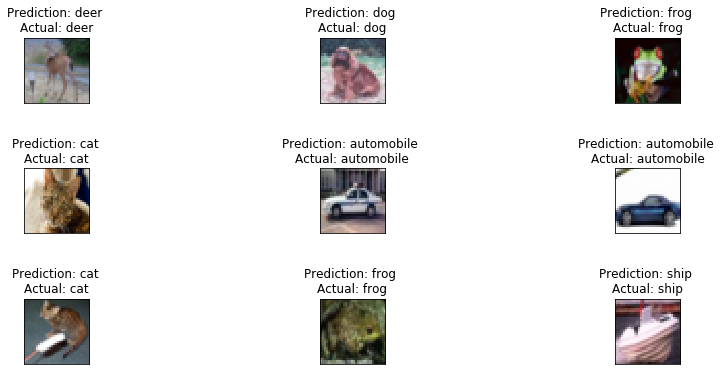

In [34]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    
    # determine label for each predictions, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {} \nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    #plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()

### Conclusion: Successfully performed Object Recognition over CIFAR-10 using CNN.